In [1]:
import sys

sys.path.append('/Users/huberyhu/Desktop/SURP/im_deinfluence/model_code')

import networkx as nx
import experiment_framework as ef
import matplotlib.pyplot as plt
import copy

In [2]:
G = nx.erdos_renyi_graph(2000, 0.005)
model = ef.run_influence_cascade(G, num_influencers=20, steps=3, selection_method='random')

In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1850
Number of deinfluenced nodes: 0
Number of susceptible nodes: 150
influencer {1024, 637, 1801, 1290, 1291, 1165, 783, 1682, 1558, 921, 676, 1189, 1701, 551, 936, 681, 1320, 171, 1068, 1069, 562, 1339, 571, 1853, 959, 703, 65, 194, 839, 804, 1489, 467, 983, 1240, 1113, 1881, 739, 100, 1382, 1643, 1390, 381, 243, 1523, 114, 889, 634, 1403, 1916, 509}


In [4]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': {657}}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657}}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657, 1040}}), (4, {'Random': {639}, 'High Degree': set(), 'Low Degree': {848, 657, 1040}}), (5, {'Random': {179, 876}, 'High Degree': {1106}, 'Low Degree': {848, 657, 18, 1040}}), (6, {'Random': {187}, 'High Degree': {1106}, 'Low Degree': {848, 657, 18, 1040, 247}}), (7, {'Random': {1282, 531}, 'High Degree': {1106}, 'Low Degree': {848, 657, 18, 1040, 247}}), (8, {'Random': {1042, 1134}, 'High Degree': {1106}, 'Low Degree': {503, 848, 657, 18, 1040, 247}}), (9, {'Random': {273, 1980, 29}, 'High Degree': {1106, 1741}, 'Low Degree': {503, 749, 848, 657, 18, 1040, 247}}), (10, {'Random': {1441, 995, 1031}, 'High Degree': {1106, 1741}, 'Low Degree': {503, 749, 848, 657, 18, 1040, 247}}), (11, {'Random': {617, 300, 1813}, 'High Degree': {1106, 1741}, 'Low Degree': {503, 749, 848, 657, 18, 1

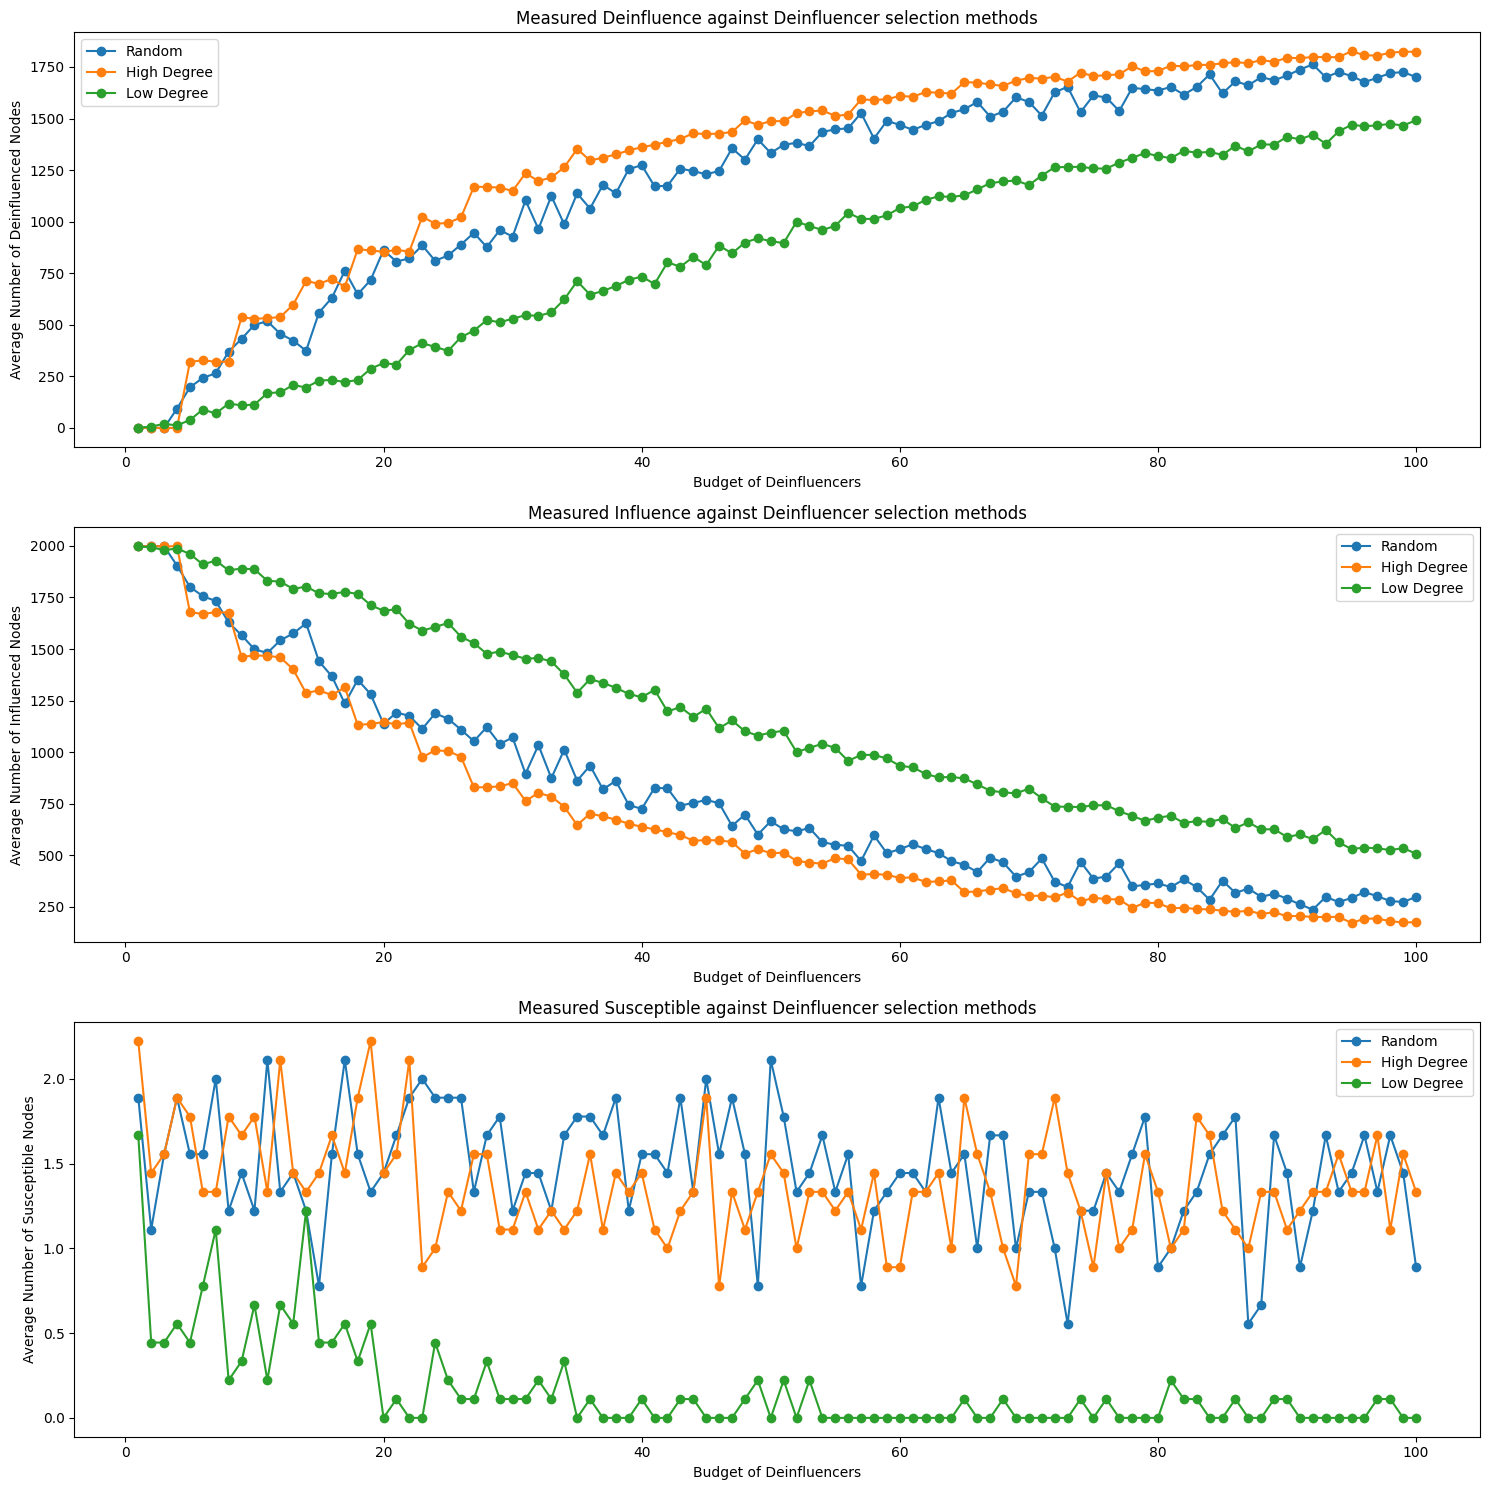

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget_naive(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': set(), 'High Degree': set(), 'Low Degree': {657}}), (2, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657}}), (3, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657, 1040}}), (4, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657, 1040}}), (5, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657, 18, 1040}}), (6, {'Random': {1773}, 'High Degree': set(), 'Low Degree': {848, 657, 18, 1040}}), (7, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657, 18, 1040, 247}}), (8, {'Random': set(), 'High Degree': set(), 'Low Degree': {848, 657, 18, 1040, 247}}), (9, {'Random': {1396}, 'High Degree': set(), 'Low Degree': {503, 848, 657, 18, 1040, 247}}), (10, {'Random': set(), 'High Degree': set(), 'Low Degree': {503, 848, 657, 18, 1040, 247}}), (11, {'Random': set(), 'High Degree': set(), 'Low Degree': {503, 749, 848, 657, 18, 1040, 247}}), (12, {'Random': {487}, 'High Degree': set(), 'Low Degree': {503, 749, 848, 657, 1

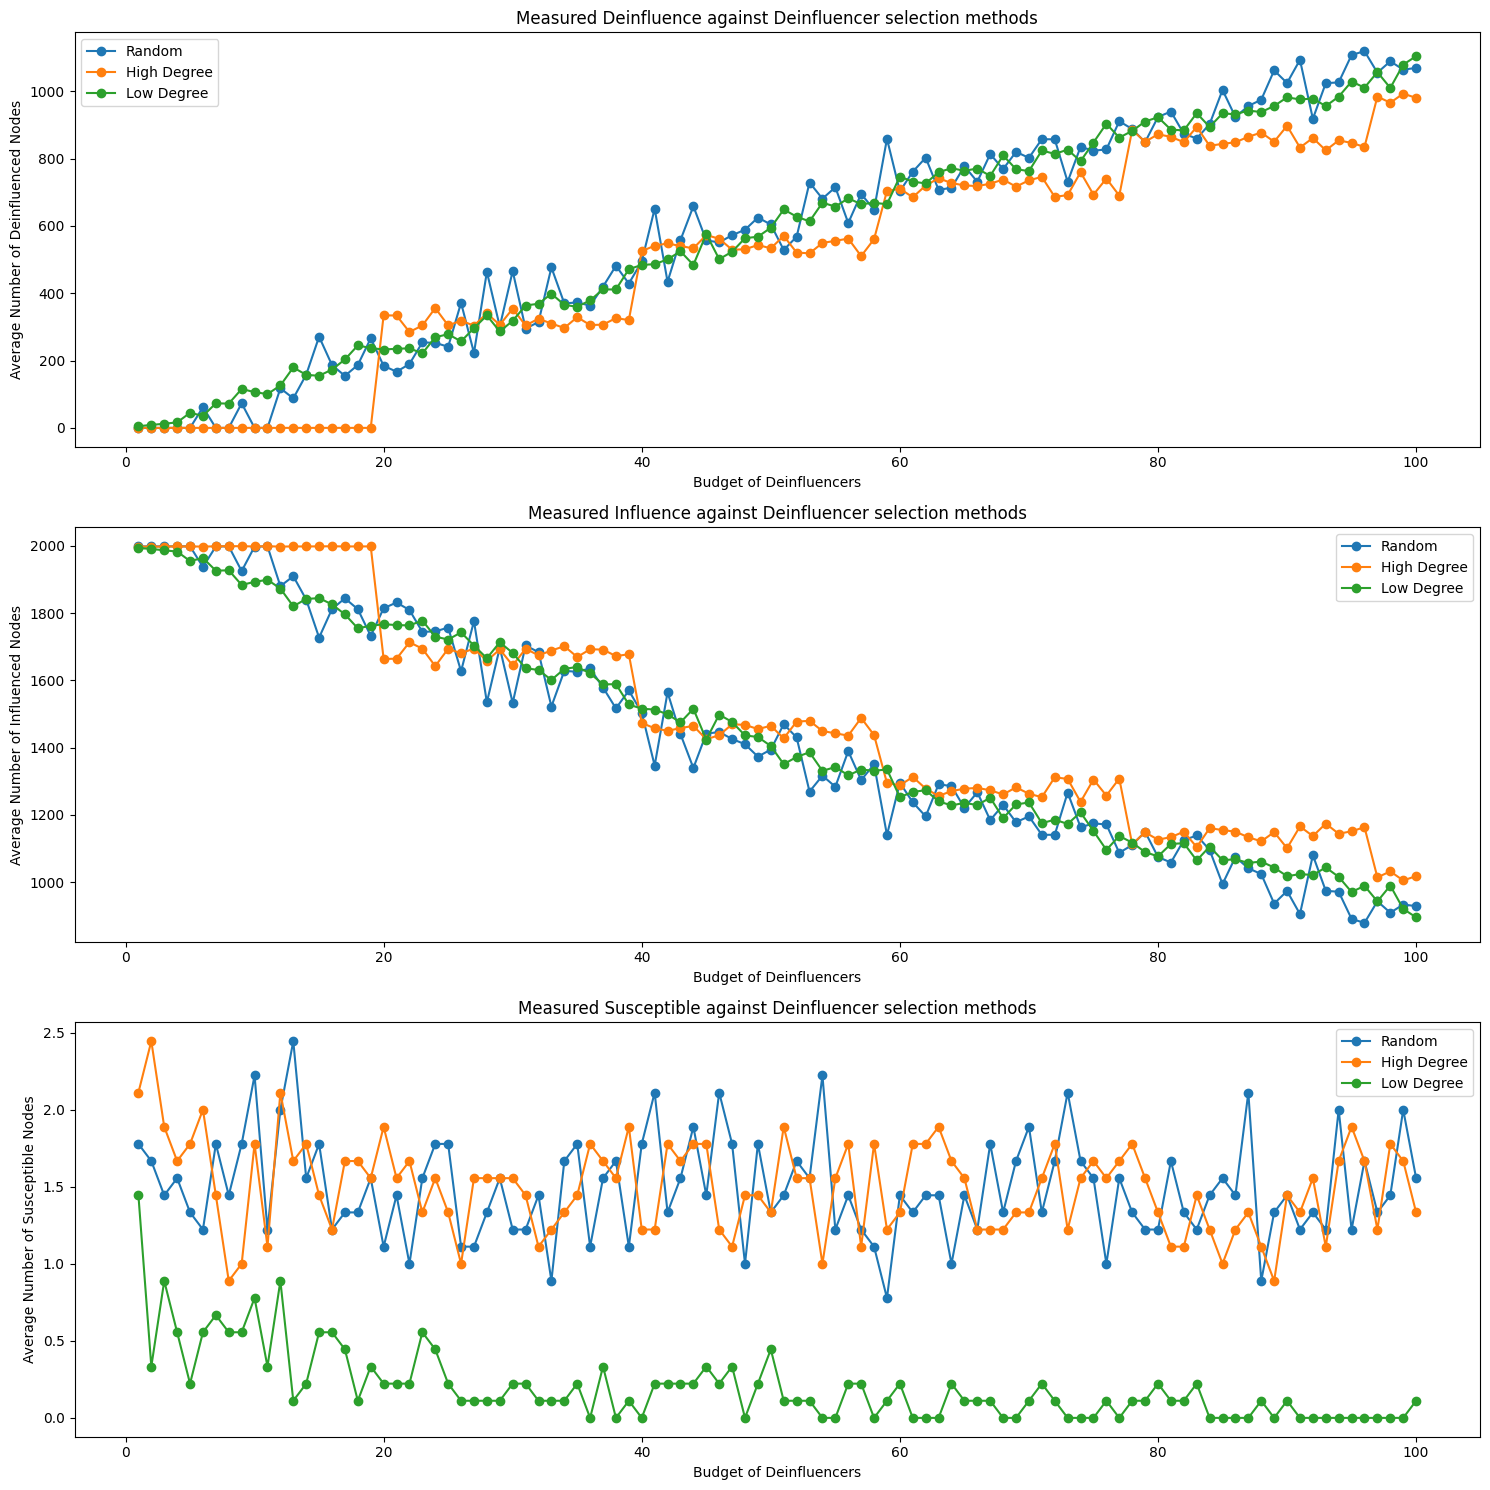

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [8]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': {657}, 'High Degree': {657}, 'Low Degree': {657}}), (2, {'Random': {749}, 'High Degree': {73}, 'Low Degree': {848, 657}}), (3, {'Random': {1575}, 'High Degree': {7}, 'Low Degree': {848, 657, 1040}}), (4, {'Random': {503, 983}, 'High Degree': {189}, 'Low Degree': {848, 657, 1040}}), (5, {'Random': {1113, 1189}, 'High Degree': {1106}, 'Low Degree': {848, 657, 18, 1040}}), (6, {'Random': {98, 158}, 'High Degree': {1106, 18}, 'Low Degree': {848, 657, 18, 1040, 247}}), (7, {'Random': {971, 164, 894}, 'High Degree': {1106, 23}, 'Low Degree': {848, 657, 18, 1040, 247}}), (8, {'Random': {1392, 875, 749}, 'High Degree': {1106, 11}, 'Low Degree': {503, 848, 657, 18, 1040, 247}}), (9, {'Random': {1409, 129, 1164}, 'High Degree': {1106, 1741}, 'Low Degree': {503, 749, 848, 657, 18, 1040, 247}}), (10, {'Random': {578, 451, 686}, 'High Degree': {657, 1106, 1741}, 'Low Degree': {503, 749, 848, 657, 18, 1040, 247}}), (11, {'Random': {1427, 1252, 1141, 1406}, 'High Degree': {73, 1106, 1

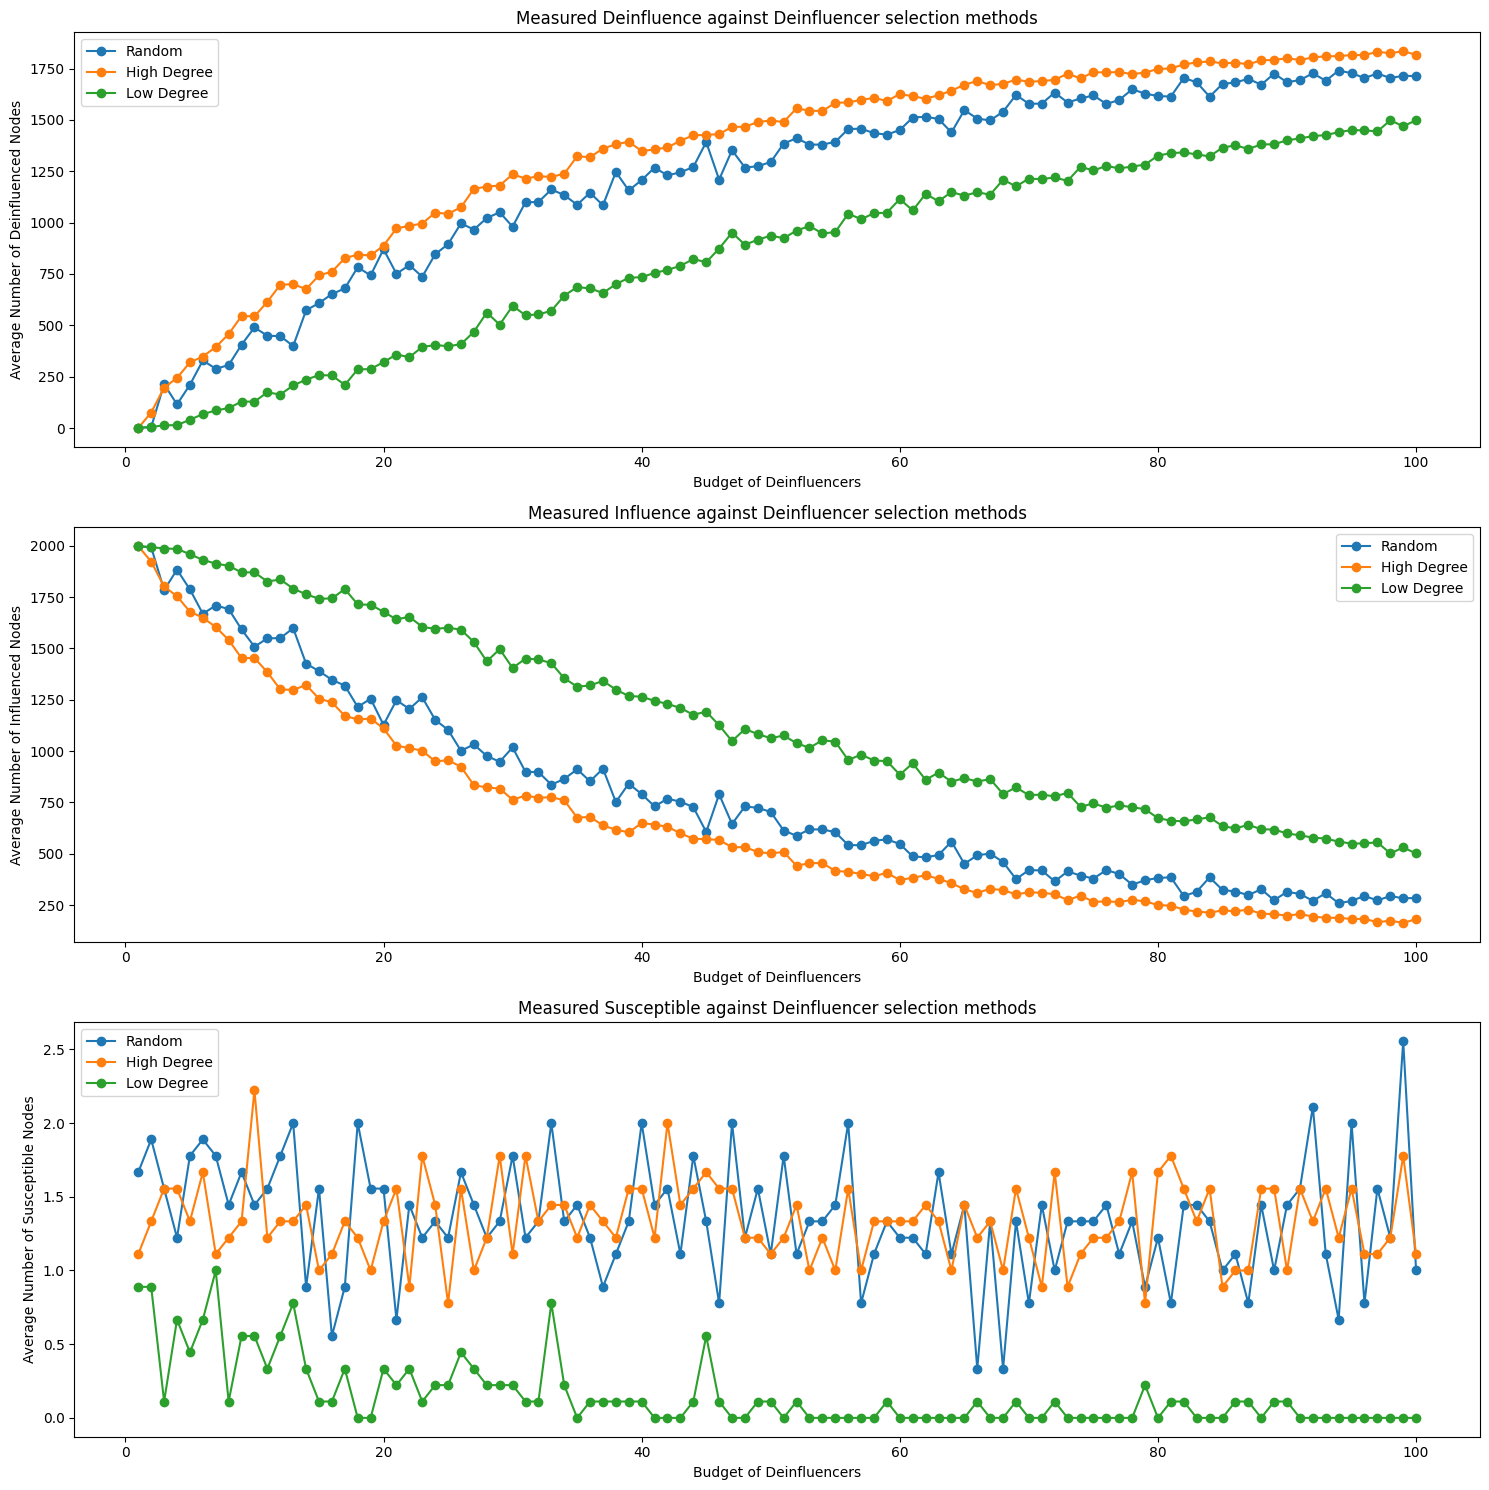

In [9]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [10]:
# Run simulation for different values of k
budget_list = list(range(1, 101))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_linear')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(1, {'Random': {657}, 'High Degree': {657}, 'Low Degree': {657}}), (2, {'Random': {1186}, 'High Degree': {18}, 'Low Degree': {848, 657}}), (3, {'Random': {1614}, 'High Degree': {3}, 'Low Degree': {848, 657, 1040}}), (4, {'Random': {1974}, 'High Degree': {73}, 'Low Degree': {848, 657, 1040}}), (5, {'Random': {1504}, 'High Degree': {6}, 'Low Degree': {848, 657, 18, 1040}}), (6, {'Random': {1168, 848}, 'High Degree': {23}, 'Low Degree': {848, 657, 18, 1040}}), (7, {'Random': {1375, 503}, 'High Degree': {22}, 'Low Degree': {848, 657, 18, 1040, 247}}), (8, {'Random': {852}, 'High Degree': {0}, 'Low Degree': {848, 657, 18, 1040, 247}}), (9, {'Random': {1477}, 'High Degree': {7}, 'Low Degree': {503, 848, 657, 18, 1040, 247}}), (10, {'Random': {1168, 1932, 646}, 'High Degree': {8}, 'Low Degree': {503, 848, 657, 18, 1040, 247}}), (11, {'Random': {657, 50}, 'High Degree': {1}, 'Low Degree': {503, 749, 848, 657, 18, 1040, 247}}), (12, {'Random': {227}, 'High Degree': {11}, 'Low Degree': {503, 74

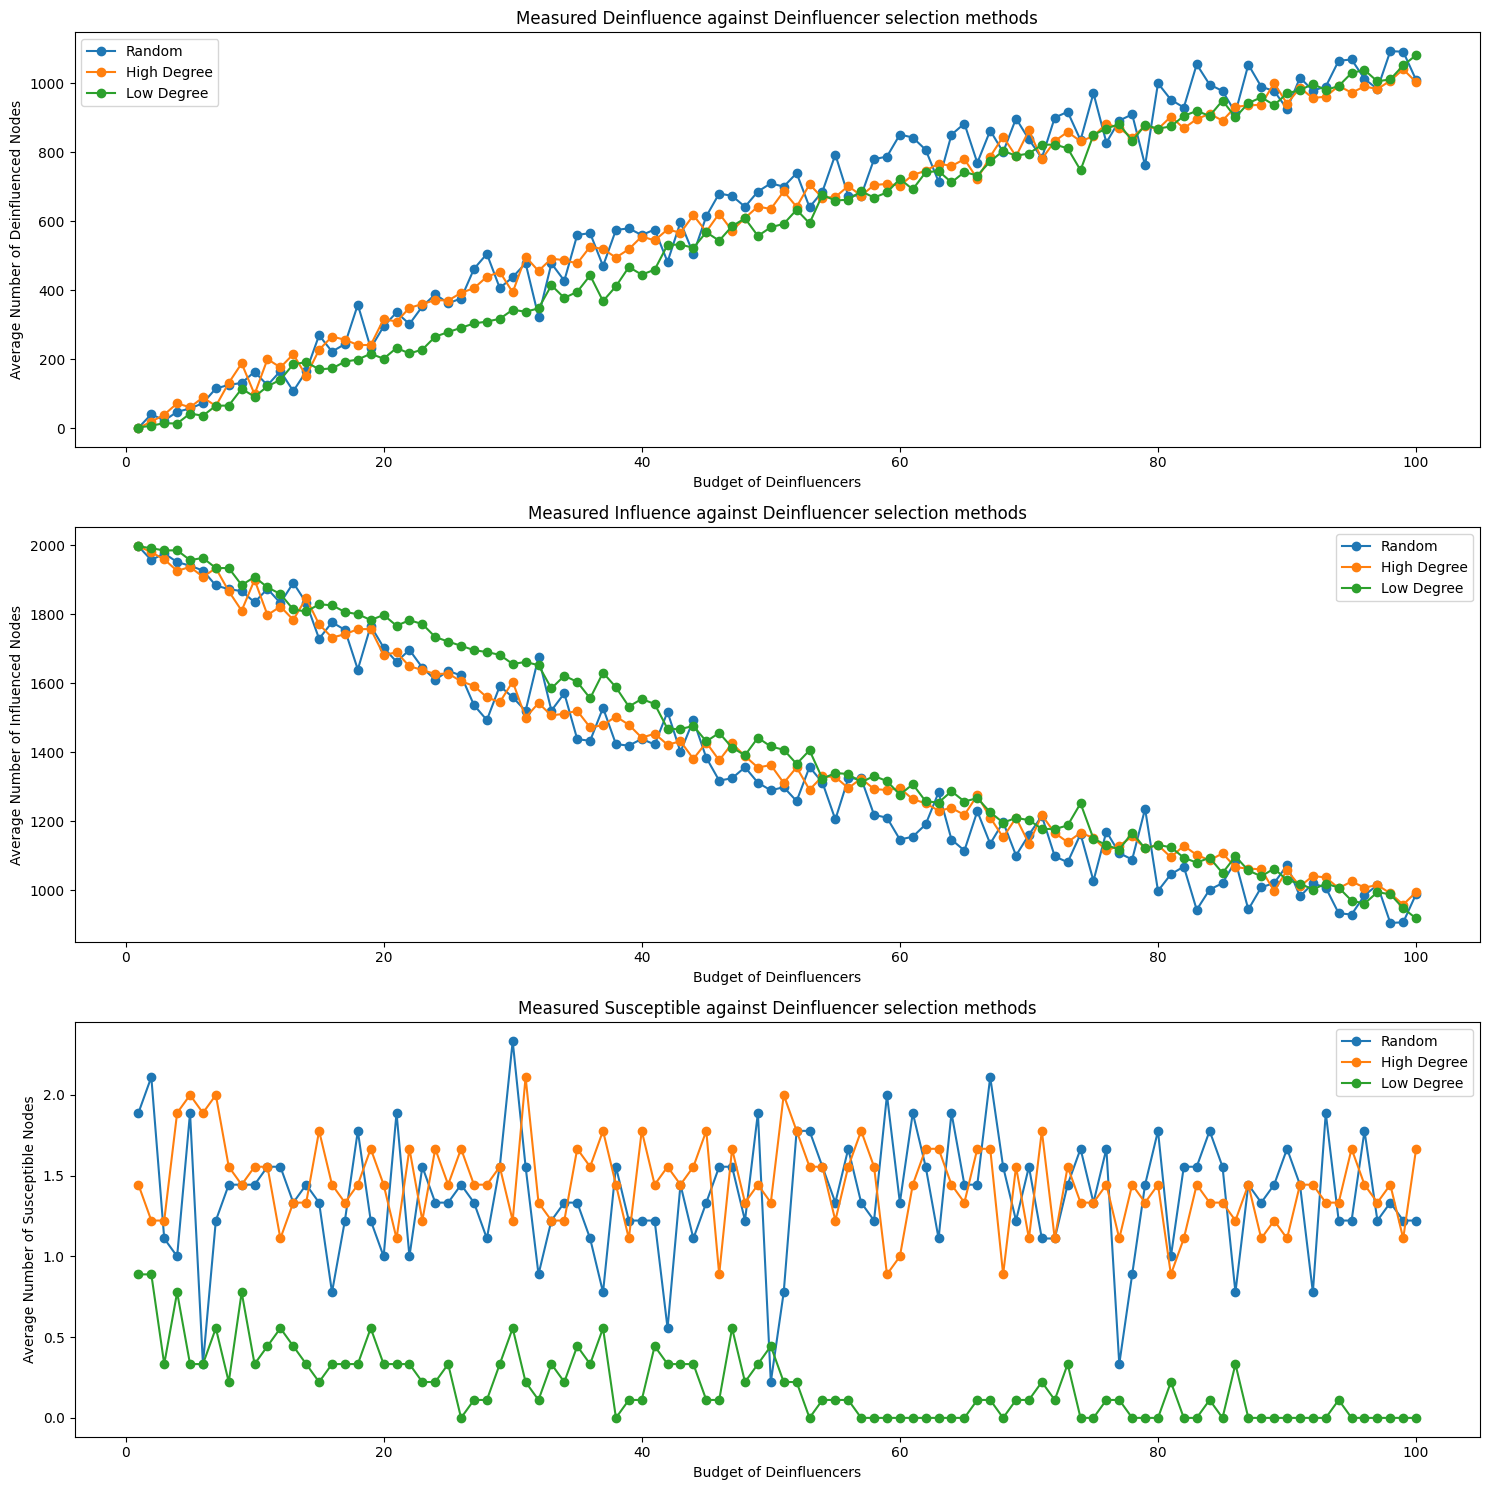

In [11]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()